한국 복지 패널은 빈곤층, 근로빈곤층, 차상위층 등 다양한 계층의 규모 및 생활 실태 변화를 추적하여 파악함으로써 정책 형성에 기여하고 있다.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn에서 제공하는 그래프테마
# sns.set_style("ticks")
# sns.set_style("darkgrid")
sns.set_style("whitegrid")

# 그래프를 그리기 위한 기본 설정
# 폰트설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'

# 폰트설정 - 맥
# plt.rcParams['font.family'] = 'Apple Gothic'

# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

# 글자 크기
plt.rcParams['font.size'] = 14

# 폰트 설정 시 '-'기호 깨는거 방지하기
plt.rcParams['axes.unicode_minus'] = False

### 데이터를 읽어온다.

In [31]:
df = pd.read_excel('data/dataset2017.xlsx')
# df.head()

- h12_g3 : 성별 - 남자(1), 여자(2), 모름/무응답(9)
- h12_g4 : 태어난 년도, 1900-2014, 모름/무응답(9999)
- h12_g10 : 혼인상태, 유배우(1), 사별(2), 이혼(3), 별거(4), 미혼(5, 18세 이상, 미혼모 포함), 기타(6, 사망 등), 해당없음(0, 18세미만), 모름/무응답(9)
- h12-g11 : 종교. 있음(1), 없음(2), 모름/무응답(9)
- h12_eco9 : 직종. 직종코드표를 참고. 모름/무응답(9999)
- p1202-8aq1 : 일한 달의 월 평균 임금
- h12_reg7 : 7개 권역별 지역 구분. 서울(1), 수도권(2, 인천/경기), 부산/울산/경남(3), 대구/경북(4), 대전/충남(5), 강원/충북(6), 광주/전남/전북/제주도(7)

In [32]:
# 너무 많아 안나옴 ㅋㅋㅋㅋ 그렇지만 entries나 columns는 알 수 있음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


### 조사 대상에 대한 성별 분포

In [33]:
# 성별 컬럼만 추출
df2 = df.filter(['h12_g3'])
# df2 = df[['h12_g3']]도 됨
df2

,h12_g3
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [34]:
# 컬럼 이름 변경
df2.columns = ['성별']
df2

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [35]:
# 결측치 확인
df2['성별'].isna().sum()

0

In [36]:
# 이상치 확인
df2['성별'].value_counts()

2    8440
1    6982
Name: 성별, dtype: int64

결측치도 없고 성별도 남자, 여자로만 되어있다. 개이득

In [37]:
# 성별값을 남자, 여자로 바꾼다.
a1 = {
    1 : '남자',
    2 : '여자'
}

# 딕셔너리를 데이터 프레임에 맵핑하기
df2['성별'] = df2['성별'].map(a1)
df2

,성별
0,여자
1,여자
2,남자
3,남자
4,여자
...,...
15417,여자
15418,여자
15419,남자
15420,여자


남자, 여자 수 시각화하기.

In [38]:
# 각 성별의 수를 구한다.
a1 = df2.value_counts()
print(type(a1))
df3 = pd.DataFrame(a1)
df3

<class 'pandas.core.series.Series'>


,0
성별,
여자,8440
남자,6982


In [39]:
# 컬럼의 이름을 변경한다. 
df3.columns = ['인원 수 (명)']
df3

,인원 수 (명)
성별,
여자,8440
남자,6982


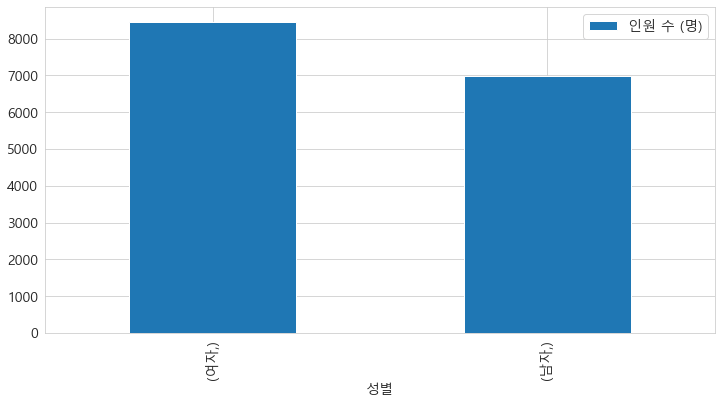

In [40]:
# 시각화
df3.plot.bar()
plt.show()

`text(index, value(높이), text)` : 그래프에 텍스트를 적어놓는다. 텍스트의 위치를 index와 value로 정할 수 있다.

여자    8440
남자    6982
Name: 성별, dtype: int64


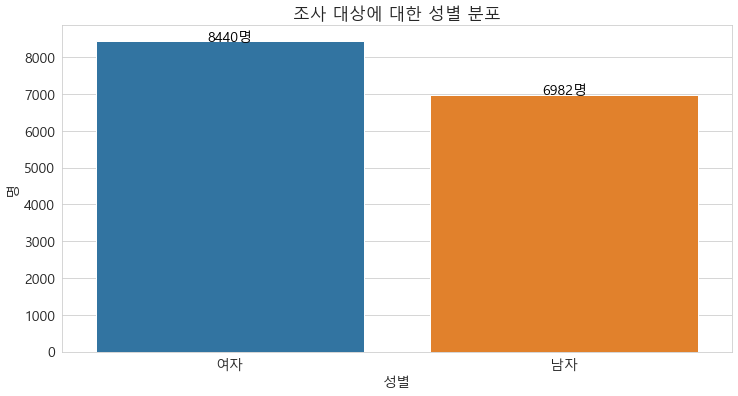

In [46]:
# countplot 사용
sns.countplot(x='성별', data=df2)
plt.title('조사 대상에 대한 성별 분포')
plt.ylabel('명')

# 저장되어 있는 값의 수를 파악한다.
a100 = df2['성별'].value_counts()
print(a100)
for idx, value in enumerate(a100):
    # 표시할 문자열
    txt = f'{value}명'
    # 문자열을 표시한다. 
    plt.text(idx, value+100, txt, color = 'black', horizontalalignment='center')
plt.show()

### 성별에 따른 평균 월급 차이 분석

In [71]:
# 데이터 추출
df2 = df[['h12_g3', 'p1202_8aq1']]
df2

,h12_g3,p1202_8aq1
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [72]:
df2.columns = ['성별', '월급']
df2

,성별,월급
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [73]:
# 성별 데이터를 변경한다.
a1 = {
    1 : '남자',
    2 : '여자'
}

df2['성별'] = df2['성별'].map(a1)
df2

<ipython-input-73-fd1ff5a5d399>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['성별'] = df2['성별'].map(a1)


,성별,월급
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN
...,...,...
15417,여자,NaN
15418,여자,NaN
15419,남자,72.0
15420,여자,NaN


In [74]:
# 결측치 확인
df2.isna().sum()

성별        0
월급    10915
dtype: int64

In [75]:
# 이상치 확인
df2['월급'].agg(['min', 'max'])

min       0.0
max    1874.0
Name: 월급, dtype: float64

In [76]:
# 결측치인 row를 모두 제거한다.
df2.dropna(inplace=True)
display(df2)
df2.isna().sum()

<ipython-input-76-c9777253afe0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


,성별,월급
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0
...,...,...
15400,남자,230.0
15401,여자,138.0
15404,여자,286.0
15412,남자,179.0


성별    0
월급    0
dtype: int64

In [77]:
df2.shape

(4507, 2)

In [78]:
# 성별에 따른 월급 평균을 구한다.
# 성별과 급여평균 형태로 되어 있는 데이터 프레임을 생성한다.
a1 = df2.groupby('성별').mean()
display(a1)


,월급
성별,
남자,333.280785
여자,175.293108


In [79]:
# index를 데이터에 포함시킨다.
a1.reset_index(inplace=True)
a1

,성별,월급
0,남자,333.280785
1,여자,175.293108


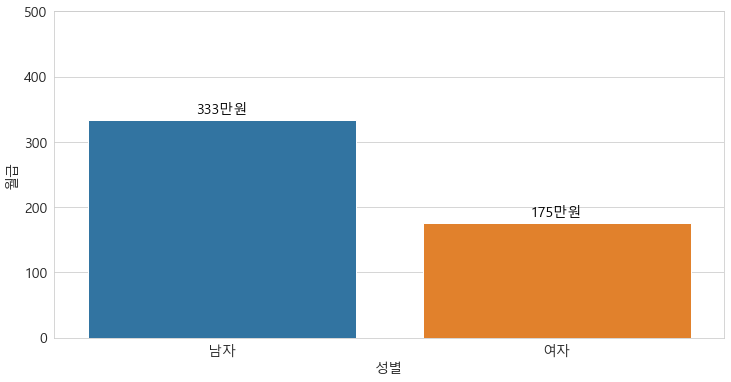

In [86]:
# 시각화
ax=arplot(x='성별', y='월급', data=a1)

for idx, value in enumerate(a1['월급']):
    # 표시할 문자열
    txt = f'{int(value)}만원'
    # 문자열을 표시한다. 
    plt.text(idx, value+10, txt, color = 'black', horizontalalignment='center')
    
plt.ylim(0, 500)
plt.show()

### 나이에 따른 평균 월급의 변화

In [87]:
df2 = df[['h12_g4', 'p1202_8aq1']]
df2

,h12_g4,p1202_8aq1
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [88]:
# 컬럼 이름을 변경한다.
df2.columns = ['출생년도', '월급']
df2

,출생년도,월급
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [90]:
# 나이를 구해 추가해준다.
df2['나이'] = 2017 - df2['출생년도'] + 1
df2

<ipython-input-90-4323fe544e1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['나이'] = 2017 - df2['출생년도'] + 1


,출생년도,월급,나이
0,1936,NaN,82
1,1945,NaN,73
2,1948,NaN,70
3,1942,108.9,76
4,1923,NaN,95
...,...,...,...
15417,1967,NaN,51
15418,1992,NaN,26
15419,1995,72.0,23
15420,1998,NaN,20


In [91]:
# 결측치 확인
df2.isna().sum()

출생년도        0
월급      10915
나이          0
dtype: int64

월급에 결측치가 많다 ㅜㅜ

In [92]:
# 이상치 확인
df2.agg(['min', 'max'])

,출생년도,월급,나이
min,1907,0.0,2
max,2016,1874.0,111


In [94]:
# 결측치 처리
# 월급이 결측치인 곳은 평균으로 채워준다.
# 월급의 평균을 구한다.
m1 = df2['월급'].mean()
print(f'월급 평균: {int(m1)}')


월급 평균: 257


In [100]:
# 월급 평균 257이기 때문에 임의로 기준을 정해보았다.
# 10살 미만 : 0원
# 10살 ~ 20살 : 30만원
# 20 ~ 30살 : 200만원
# 30 ~ 40살 : 300만원
# 40 ~ 50살 : 400만원
# 50살 이상: 300만원

idx1 = df2[(df2['월급'].isna()) & (df2['나이'] < 10)].index
idx2 = df2[(df2['월급'].isna()) & (10 <= df2['나이']) & (df2['나이'] < 20)].index
idx3 = df2[(df2['월급'].isna()) & (20 <= df2['나이']) & (df2['나이'] < 30)].index
idx4 = df2[(df2['월급'].isna()) & (30 <= df2['나이']) & (df2['나이'] < 40)].index
idx5 = df2[(df2['월급'].isna()) & (40 <= df2['나이']) & (df2['나이'] < 50)].index
idx6 = df2[(df2['월급'].isna()) & (50 <= df2['나이'])].index

df2.loc[idx1, '월급'] = 0
df2.loc[idx2, '월급'] = 30
df2.loc[idx3, '월급'] = 200
df2.loc[idx4, '월급'] = 300
df2.loc[idx5, '월급'] = 400
df2.loc[idx6, '월급'] = 300

df2['월급'].isna().sum()

C:\Users\medici\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0

In [101]:
# 나이별 급여 평균을 구한다.
df3 = df2[['월급', '나이']]
result_df = df3.groupby('나이').mean()
result_df

,월급
나이,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
...,...
98,300.0
99,300.0
101,300.0


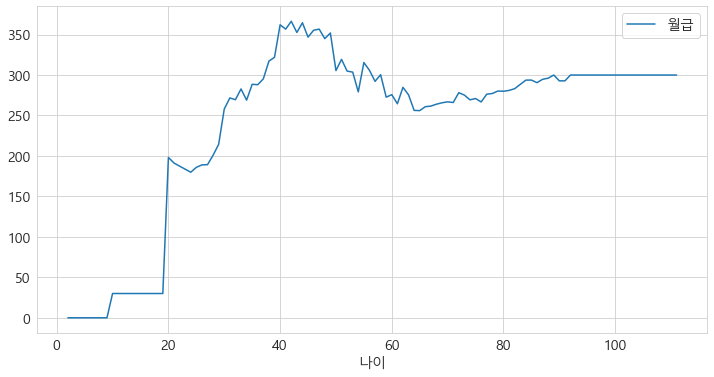

In [102]:
result_df.plot()
plt.show()

In [107]:
# 결측치를 제거하고 시각화
df2 = df[['h12_g4', 'p1202_8aq1']]
df2.columns = ['출생년도', '월급']
df2['나이'] = 2017 - df2['출생년도'] + 1
df2.dropna(inplace=True)
df2.drop('출생년도', axis=1, inplace=True)
df2

<ipython-input-107-bfb84f280084>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['나이'] = 2017 - df2['출생년도'] + 1
<ipython-input-107-bfb84f280084>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\medici\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,월급,나이
3,108.9,76
10,20.0,78
16,322.0,40
17,120.0,43
24,300.0,43
...,...,...
15400,230.0,52
15401,138.0,56
15404,286.0,25
15412,179.0,62


In [108]:
# 나이별 월급 평균을 구한다.
result_df = df2.groupby('나이').mean()
result_df

,월급
나이,
20,89.333333
21,136.720000
22,140.807692
23,138.000000
24,145.652000
...,...
86,21.200000
87,25.000000
88,20.000000


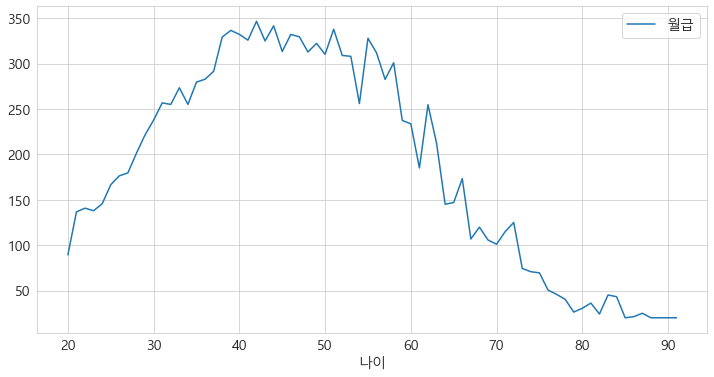

In [109]:
result_df.plot()
plt.show()

### 성별과 연령대 분포

In [126]:
df2 = df[['h12_g3', 'h12_g4']]
df2.columns = ['성별', '출생년도']
df2['나이'] = 2017 - df2['출생년도'] + 1
df2.drop('출생년도', axis=1, inplace=True)
df2

<ipython-input-126-79e305eda7f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['나이'] = 2017 - df2['출생년도'] + 1
C:\Users\medici\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,성별,나이
0,2,82
1,2,73
2,1,70
3,1,76
4,2,95
...,...,...
15417,2,51
15418,2,26
15419,1,23
15420,2,20


In [127]:
# 성별 변경
a1 = {
    1 : '남자',
    2 : '여자'
}
df2['성별'] = df2['성별'].map(a1)
df2

<ipython-input-127-5faa1f9b5d4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['성별'] = df2['성별'].map(a1)


,성별,나이
0,여자,82
1,여자,73
2,남자,70
3,남자,76
4,여자,95
...,...,...
15417,여자,51
15418,여자,26
15419,남자,23
15420,여자,20


In [128]:
# 연령대를 구한다.
df2['연령대'] = df2['나이'] // 10 * 10
df2

<ipython-input-128-37048d111e64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['연령대'] = df2['나이'] // 10 * 10


,성별,나이,연령대
0,여자,82,80
1,여자,73,70
2,남자,70,70
3,남자,76,70
4,여자,95,90
...,...,...,...
15417,여자,51,50
15418,여자,26,20
15419,남자,23,20
15420,여자,20,20


In [131]:
# 연령대별 남자, 여자의 수를 구한다.
result_df = df2.groupby(['연령대', '성별'], as_index=False).count()
result_df

,연령대,성별,나이
0,0,남자,443
1,0,여자,426
2,10,남자,830
3,10,여자,785
4,20,남자,606
5,20,여자,801
6,30,남자,688
7,30,여자,740
8,40,남자,1068
9,40,여자,1006


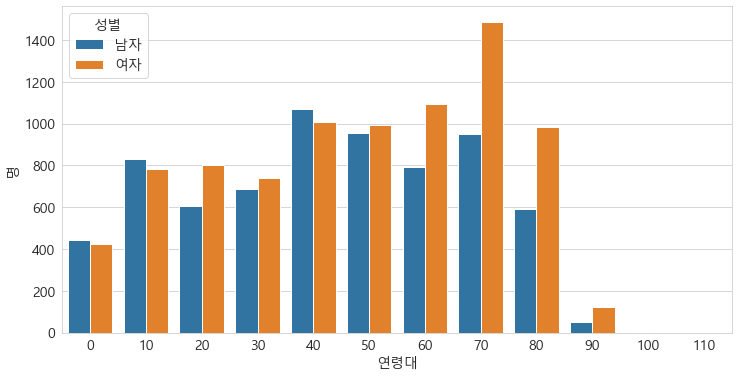

In [138]:
result_df.columns = ['연령대', '성별', '명']
sns.barplot(x='연령대', y='명', hue = '성별', data=result_df)
plt.show()